# Skeleton of Assignment 4:

test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.
    

In [4]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV
from datetime import datetime
#import scipy.stats

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read in data
You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [5]:

def getCitiBikeCSV(date):
    ''' 
    This function returns citi bike data for a given month(s)
    
    Parameters
    ----------
    date: string
        Pass one month by inputting format <YYYY><MM>; EX: 201801
        Pass month range by inputting format <YYYY><M1M1><M2M2>; EX: 20180103
        
    Returns
    ----------
    csv: table
        dumps it into your PUIDATA folder
    '''
    path = "https://s3.amazonaws.com/tripdata/{}-citibike-tripdata.csv.zip".format(date)
    os.system('curl -O ' + path)
    currentpath = !pwd
    os.system('unzip -u '+currentpath[0]+'/'+ path.split('/')[-1]+ ' -d $PUIDATA')
    print('Downloaded',path.split('/')[-1].split('.z')[0], 'to your PUIDATA folder!')

In [6]:
## Downloading data for January and July
datestring = '201801'
datestring2 = '201807'
getCitiBikeCSV(datestring)
getCitiBikeCSV(datestring2)

Downloaded 201801-citibike-tripdata.csv to your PUIDATA folder!
Downloaded 201807-citibike-tripdata.csv to your PUIDATA folder!


In [7]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv', parse_dates=['starttime','stoptime'])
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv', parse_dates=['starttime','stoptime'])
df_combined = pd.concat([df,df2])
df_combined.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1


In [8]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01 13:50:57.434
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01 15:33:30.182
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01 15:39:18.337
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01 15:40:13.372
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01 18:14:51.568


In [9]:
# df is the dataframe where the content of the csv file is stored
df_combined['date'] = pd.to_datetime(df_combined['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df_combined.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01 13:50:57.434
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01 15:33:30.182
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01 15:39:18.337
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01 15:40:13.372
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01 18:14:51.568


In [10]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [11]:
df_combined.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [12]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [13]:
#dropping some data I no longer need
#... your code here...
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01 13:50:57.434,23.0,NaN
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01 15:33:30.182,46.0,NaN
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01 15:39:18.337,59.0,NaN
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01 15:40:13.372,41.0,NaN
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01 18:14:51.568,23.0,NaN


In [14]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,7.189940e+05,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,534683.000000,149745.000000
mean,8.268107e+02,1469.519095,40.737894,-73.982934,1460.948474,40.737620,-73.983203,26078.046315,1977.765945,1.169969,37.126671,36.272370
std,3.279694e+04,1398.626487,0.044702,0.018219,1396.759046,0.044525,0.018273,6311.931441,12.016931,0.472668,12.079779,12.031133
min,6.100000e+01,72.000000,40.646538,-74.017134,72.000000,40.646538,-74.033552,14529.000000,1885.000000,0.000000,13.000000,14.000000
25%,3.190000e+02,377.000000,40.719079,-73.994685,376.000000,40.719105,-73.994758,19558.000000,1969.000000,1.000000,NaN,NaN
50%,5.100000e+02,497.000000,40.739355,-73.985649,497.000000,40.739323,-73.986580,28538.000000,1980.000000,1.000000,NaN,NaN
75%,8.420000e+02,3170.000000,40.756687,-73.974987,3169.000000,40.756405,-73.975232,31571.000000,1988.000000,1.000000,NaN,NaN
max,1.951005e+07,3664.000000,45.506364,-73.568906,3664.000000,45.506364,-73.568906,33522.000000,2002.000000,2.000000,129.000000,99.000000


In [15]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

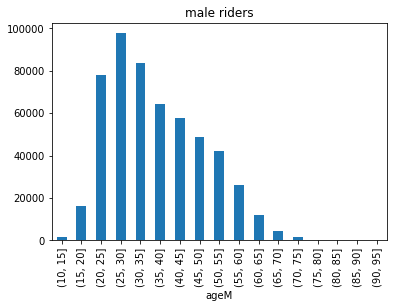

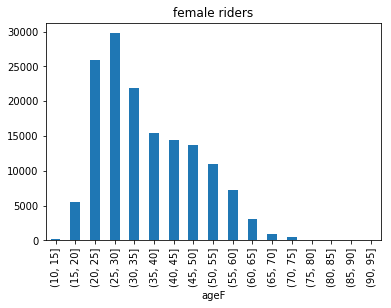

In [16]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");

**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.001450
(15, 20]       0.004762
(20, 25]       0.032128
(25, 30]       0.047967
(30, 35]       0.037582
(35, 40]       0.020411
(40, 45]       0.008699
(45, 50]       0.008864
(50, 55]       0.003343
(55, 60]       0.003571
(60, 65]       0.001529
(65, 70]       0.000560
(70, 75]       0.000369
(75, 80]       0.000411
(80, 85]       0.000135
(85, 90]       0.000112
(90, 95]       0.000000


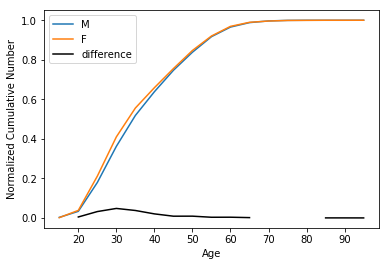

In [17]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [18]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

KS test is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test).
The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In each case, the distributions considered under the null hypothesis are continuous distributions but are otherwise unrestricted.

NULL HYPOTHESIS
## H_0
Male age and Woman age follow the same distribution

Significance level is 0.05

$H_0: p-value_{ab}>0.05$

where $p-value_{ab}$: is the p-value of the KS test

Alternative Hypothesis:
Male age and Woman age follow the same distribution.

$H_a: |p-value_{ab}|< 0$


## The result of scipy KS test has two conponents: statistic value is 0.09128675483027056, and pvalue is 1.1723000718567192e-307. The pvalue is larger than 1, thus we cannot reject the Null Hypothesis. 




In [19]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.04822054509502921, pvalue=7.4083776550613414e-237)


**  FILL IN THE CELL BELOW!**

# Extra Credit Attempt

In [20]:
# Extra credit:
# df_MnB['meanHour'] = Z=np.array(data.index)
# manhattanInd=(Z>10000)&(Z<10300) #Manhattan
# brooklynInd=(Z>=11000)&(Z<11300) #Brooklyn

# # create borough labels 
# Z=np.array(data.index)
# manhattanInd=(Z>10000)&(Z<10300) #Manhattan
# brooklynInd=(Z>=11000)&(Z<11300) #Brooklyn

# #create an array of the same length as data311 index providing the borough number
# D=Z*0
# D[manhattanInd]=1
# D[brooklynInd]=2

# # P[ind, 0]
# for d, label in zip(range(1,6), ["Manhattan",  "Brooklynn"]):
#     ind=D==d #take only images of a certain digit
#     df_combined['location'] = (df_combined[ind])

In [30]:
#Calculate 'Mean_Hour' and separate trip duration into two columns (Day vs Night)
df_combined['start'] = (df_combined['starttime']).dt.hour
df_clean = df_combined[['tripduration','start']]
df_clean.reset_index(inplace=True)
df_clean['trip_night'] = df_clean['tripduration'][(df_clean.start<4) | (df_clean.start>18)]
df_clean['trip_day'] = df_clean['tripduration'][(df_clean.start>4) & (df_clean.start<18)]
df_clean.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,index,tripduration,start,trip_night,trip_day
count,2.632619e+06,2.632619e+06,2.632619e+06,5.479420e+05,1.837665e+06
mean,7.936793e+05,1.006886e+03,1.400833e+01,1.080507e+03,9.798305e+02
std,5.517383e+05,2.155968e+04,4.880370e+00,2.230314e+04,1.727619e+04
min,0.000000e+00,6.100000e+01,0.000000e+00,6.100000e+01,6.100000e+01
25%,3.290770e+05,3.610000e+02,1.000000e+01,NaN,NaN
50%,6.581540e+05,6.080000e+02,1.500000e+01,NaN,NaN
75%,1.255470e+06,1.070000e+03,1.800000e+01,NaN,NaN
max,1.913624e+06,1.951005e+07,2.300000e+01,1.169975e+07,1.113881e+07


In [31]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

def calc_CA(x,y):
    n_m, n_f, ca = len(x),len(y), 1.36 # n observations for each, 1.36 comes from c(a) table below
    return(ca*np.sqrt((n_m+n_f)/(n_m*n_f))) # equation for comparison value
CA_val = calc_CA(df_clean.trip_day,df_clean.trip_night)

print('KS-Statistic: ',ks.statistic)
print('P-Value: ',ks.pvalue)
print('Comparison value: ',CA_val)
print('Do We Reject the null: ', ks.statistic>CA_val)

KS-Statistic:  0.048220545095
P-Value:  7.40837765506e-237
Comparison value:  0.0011853862916
Do We Reject the null:  True


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

# Result
Therefore, using an alpha level of 0.05, we were able to reject the null. The KS scipy package returned a ks statistic of 0.48 (relatively high), and a p-value of 0.00. When then compare the ks-stat to the result of $c(\alpha)\sqrt{\frac{(n1 + n2)}{n1n2}}$,



In [32]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
# Yes
#from IPython.display import Image
#Image(filename="../plotsforclasses/ks2sample_table.png")

In [33]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS

#selected sample of 200 from each group (day and night)
np.random.seed(1992)
sample_size = 200

#Separate into 2 dataframes
df_day = df_clean[df_clean.trip_day.notnull()].reset_index()
df_night =  df_clean[df_clean.trip_night.notnull()].reset_index()
i = np.random.choice((range(len(df_day))),size=sample_size,replace=True) # returns array of indices
i2 = np.random.choice((range(len(df_night))),size=sample_size,replace=True)

# use array of indices to select from dataframes
sample_day = df_day.ix[i] 
sample_night = df_night.ix[i2]

#sort values by trip duration
sample_day.sort_values('tripduration',ascending=True,inplace=True)
sample_night.sort_values('tripduration',ascending=True,inplace=True)

In [34]:
ks2 = scipy.stats.ks_2samp(sample_day.trip_day,sample_night.trip_night)
CA_val2 = calc_CA(sample_day.trip_day,sample_day.trip_night)

print('KS-Statistic: ',ks2.statistic)
print('P-Value: ',ks2.pvalue)
print('Comparison value: ',CA_val2)
print('Do We Reject the null: ', ks2.statistic>CA_val2)

KS-Statistic:  0.065
P-Value:  0.778707124324
Comparison value:  0.136
Do We Reject the null:  False


# KS Testing Conclusions - Samples of 200
We failed to reject the null using our sample sizes of 200 for day and night. 
The KS scipy package returned a ks statistic of 0.5, and a p-value of 0.96. 

Night time trip durations are significantly different than day time trip durations



# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed, and not necessarily zero-mean. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

# Null Hypothesis:
There is no linear relationship between the trip duration of day and night trips.
Significance level is 0.05

$H_0: r_{pb}=0$

where $r_{pb}$: r coefficient of correlation between day and night trips

# Alternative Hypothesis:
There is a linear relationship between the day and night trips.

$H_a: |r_{pb}|> 0$

In [35]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
# use scipy package to calculate pearsons
pearsons = scipy.stats.pearsonr(sample_day.tripduration,sample_night.tripduration)
print('Pearsons R: ',pearsons[0],'\nP Value: ',pearsons[1])


Pearsons R:  0.982637205757 
P Value:  8.12854305049e-147


The correlation is high.
This makes sense since both sample sizes are sorted by trip duration.
The p-value was essentially 0.00.
We therefore can reject the null since day trips and night trips are largely correlated.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

# Null Hypothesis:
There is no linear relationship between the trip duration of day and night trips.
Significance level is 0.05

$H_0: r_{pb}=0$

where $r_{pb}$: r coefficient of correlation between day and night trips

# Alternative Hypothesis:
There is a linear relationship between the day and night trips.

$H_a: |r_{pb}|> 0$

In [36]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

spearmans = scipy.stats.spearmanr(sample_day.tripduration,sample_night.tripduration)
print('Spearmans R: ',spearmans.correlation,'\nP Value: ',spearmans.pvalue)


Spearmans R:  0.999990249668 
P Value:  0.0


** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

The correlation coefficient was extremely high at 0.9999,  which makes sense since both sample sizes are sorted by trip duration.

Unlike Pearsons, Spearmans test doesn't assume that both samples are normally distributed and doesn't only look at linear relationships

Since Spearmans R is greater than Pearsons R, the relationship between the two groups is non-linear

The p-value was essentially 0.0, meaning there is no uncertainty about the correlation.

We therefore can reject the null since day trips and night trips are extremely correlated.